# Kickstarting the ]]] Greenhouse Effect
## A Final Project for Physics 361 by Morgan Baxter and Alex Brovender

For a variety of reasons, including proximity to the sun and atmospheric and regolith composition, Mars is the number one candidate body in the solar system for future human colonization. Despite this status, there are many hurdles which humans will need to overcome in order to permanantly colonize Mars. One of the key problems is the extreme temperature variation. In order to increase the thermal inertia of the atmosphere and generally increase the average temperature, we propose a model where a large amount of CO2 is released suddenly into the atmosphere, with the intention of increasing the temperature at the poles. The Martian ice caps have a considerable amount of CO2 that, if liberated, is likely to further increase this greenhouse effect, and therefore continue to warm the planet. We use simple climate models to find the amount of energy that would be required to liberate enough CO2 to kickstart this greenhouse effect.

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/6/6a/PIA22546-Mars-AnnualCO2ice-N%26SPoles-20180806.gif" width="500"/>
</div>
$\textbf{Figure 1:}$ Extents of north (left) and south (right) polar CO2 ice during a martian year

$\textbf{Source:}$ NASA/JPL-caltech




## Hogg 2008: Glacial cycles and carbon dioxide: A conceptual model

We utilize Hogg, 2008, as a starting point for our model for the Mars climate system. The equations as he provides them are as follows:

$$ c\frac{dT}{dt} = \bar{S} + \sum_i{sin \left (\frac{2 \pi t}{\Gamma_i}\right )} + \bar{G} + A \ln \left(\frac{C}{C_0}\right) - \sigma T^4$$

$$ \frac{dC}{dt} = V - (W_0 + W_1C) + \beta (C_{max} - C)\max\left(\frac{dT}{dt} - \epsilon , 0 \right) $$

These equations in their current form are not useful to us for a variety of reasons. They include terms that account for volcanic activity, the carbon sink of the oceans, orbital pertubations, and the heat capacity of the oceans. As a result, the coupled differential equations that we will use look slightly different. However, they do take a variety of the the phenomena we want to observe into account, so they are a good starting point.

## Modified Equations

Our reduced equations look as follows:

$$ \frac{dT}{dt} = \Big[ S*(1-\alpha(C_{icecaps})) + \bar{G} + A \ln \left(\frac{C}{C_0}\right) - 4\sigma T^4 \Big] /c$$

$$\frac{dC}{dt} = (T^* - 140)\beta$$

Our state variables are $T$, the average surface temperature in Kelvin, and $C$, the mass of CO2 in the Martian atmosphere, in kilograms. Therefore, our parameters must match these units, and we list them below:

$\beta$ is the rate of carbon effect on temperature. It has units of $kg \cdot s^{-1} K^{-1}$.

$T^*$ is the temperature $\textbf{at the poles}$, in Kelvin. From the average temperature, this value is offset by -85 degrees K.

$\bar{S}$ is the rate of incoming solar radiation. This value is $589 W \cdot m^{-2}$

$(1-\alpha(C_{icecaps}))$ takes the albedo effect into account. $\alpha$ is a function of the amount of ice remaining in the icecaps. It starts at 0.25 and decreases to 0.15 when the polar ice caps are totally melted.

$\bar{G}$ is the greenhouse warming term. This should initially be on the order of $1 W \cdot m^{-2}$

$A$ represents the effect of CO2 on the radiation budget. It should be set to $5.35 W \cdot m^{-2}$. Might want to play around with this value. Hogg cites a paper that seems to detail where this value comes from.

$\frac{C}{C_0}$ represents the ratio between the mass of the CO2 currently in the atmosphere compared to the initial value. It is dimensionless.

$\sigma$ is the Stefan-Boltzmann constant, which is equal to $\frac{2 \pi^5 k^4}{15c^2 h^3} = 5.67 *10^{-8} W m^{-2} K^{-4}$.

$c$ is the specific heat capacity of CO2. We will take this to be approximately $700 J \cdot kg^{-1} \cdot K^{-1}$. This is a function of temperature and pressure, and therefore it could be more accurate to have this in function form rather than as a constant.

These two equations are enough for us to solve the system. However, it is worth taking some time to consider problems with temperature variation and CO2 sublimation. At the pressures experiences on the Martian surface, the sublimation temperature of CO2 is -125 Celsius, or 140 Kelvin. However, according to the solar radiation equation, the equlibrium temperature of Mars is 225 Kelvin. Therefore, to take this discrepency into account, we will define a temperature at the poles, as $T^*$. This will be offset from the planetary average value by 85 degrees Kelvin, so the starting temperature at the poles is low enough to keep the CO2 in solid form.

Another simplification worth noting is that much of the CO2 in the Martian atmosphere is composed of Carbon-13. This is because the lighter Carbon-12 isotope is more likely to be disassociated and given enough energy to escape the planet. The heavier Carbon-13 CO2 molecules will have slightly different properties than normal CO2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# here we define our constants and put them in a list to hand to the Euler's method routine
SB_constant = 5.67e-8
solar_constant = 589
#solar_constant = 0
G = 1
A = 20
beta = 0.1

# just to make euler's method work, will change later, but not a bad value, guessed at initial T and C values, ADJUST LATER
T_0 = 225.84
C_0 = 2.34e16

# Euler's method for C and T, stepsize dt:

t = 0.0
dt = 1.0

# saves initial carbon content for logarithmic ratio
C = C_0
T = T_0

# prepares empty lists to score C and T values
C_list = []
T_list = []

for i in range(5000):
    
    # appends new data points to list
    C_list.append(C)
    T_list.append(T)
    # defines the RHS for both differential equations
    dT = (solar_constant* + G + (A*np.log(C/C_0)) - 4*(SB_constant*(T**4)))/700
    dC = ((T-70) - 140)*beta
    
    # carries out Euler's method
    C = C + dC*dt
    T = T + dT*dt
    
    # adds dt to t before next loop
    t = t + dt

In [2]:
# this code block plots C and T vs time
def plotC_T(C_list,T_list):
    x_values = np.linspace(1,len(C_list),len(C_list))
    plt.rcParams["figure.figsize"] = (12,8)
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('$CO_2$ in atm (kg)', color=color)
    ax1.plot(x_values, C_list, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Average Surface Temperature (K)', color=color)
    ax2.plot(x_values, T_list, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()
    plt.grid()
    plt.show()
    pass

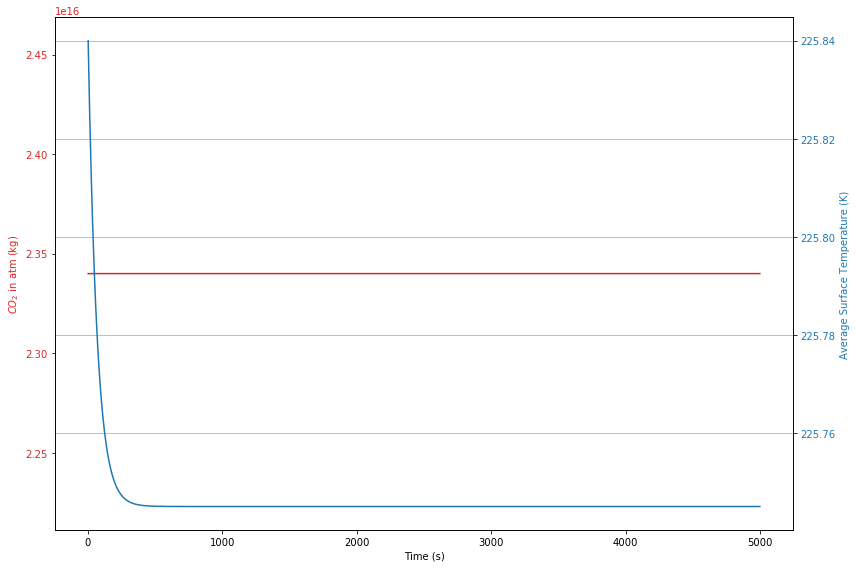

In [3]:
plotC_T(C_list,T_list)

We have now established equlibrium conditions for the Martian atmosphere. We now want to make a few changes to better reflect realistic conditions. The quantity of CO2 stored in the ice caps seems to be on the order of 1e15. This code is modified to not allow for the release of more than $5 \cdot 10^{15}$ kg of CO2 into the atmosphere. We also add the albedo effect.

In [8]:
def albedo(C_ice,C_0):
    output = np.float64()
    output = (0.1/C-0)*C_ice+0.15
    return output

In [5]:
C_icecaps = 5e15
SB_constant = 5.67e-8
solar_constant = 589
G = 1
A = 20
beta = 0.1
T_0 = 209
C_0 = 2.34e16

T_star_offset = T_0-140

t = 0.0
dt = 1.0
C = C_0
T = T_0
C_list = []
T_list = []
for i in range(5000):
    C_list.append(C)
    T_list.append(T)
    dT = (solar_constant*(1-albedo(C_icecaps)) + G + (A*np.log(C/C_0)) - 4*(SB_constant*(T**4)))/700
    
    # limits the total amount of CO2 that may be added to the atmosphere
    if C_icecaps > 0:
        dC = ((T-T_star_offset) - 140)*beta
        C_icecaps = C_icecaps - dC
    
    else:
        dC = 0
    C = C + dC*dt
    T = T + dT*dt
    t = t + dt

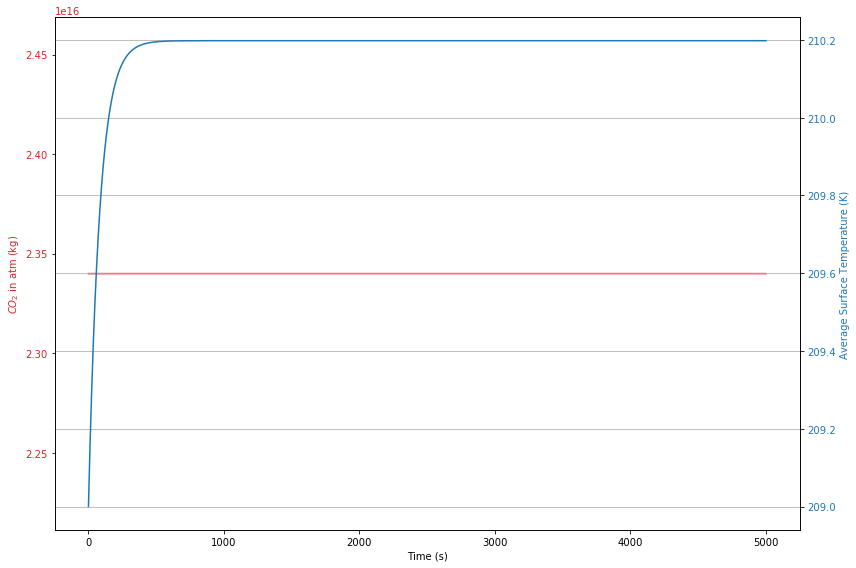

In [6]:
plotC_T(C_list,T_list)

In [7]:
def final_state(T_0,C_0,beta=0.1,G=1,):
    for i in range(5000):
        dT = (solar_constant*(1-albedo(C_icecaps)) + G + (A*np.log(C/C_0)) - 4*(SB_constant*(T**4)))/700
    
    # limits the total amount of CO2 that may be added to the atmosphere
        if C_icecaps > 0:
            dC = ((T-T_star_offset) - 140)*beta
            C_icecaps = C_icecaps - dC
    
        else:
            dC = 0
        C = C + dC*dt
        T = T + dT*dt
        t = t + dt
    
    
    return T,C